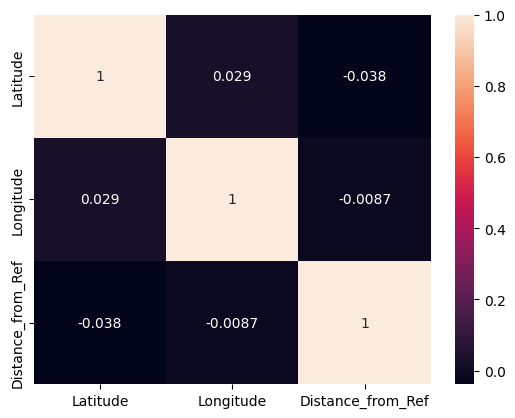

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/sample_data/lat_long_features.csv')


# 1. Distance from a reference point (e.g., the Equator and Prime Meridian intersection)
ref_lat, ref_long = 0, 0
data['Distance_from_Ref'] = np.sqrt((data['Latitude'] - ref_lat) ** 2 + (data['Longitude'] - ref_long) ** 2)


corr = data.corr()
sns.heatmap(corr,annot=True)
plt.show()

Interaction features capture the relationship between two or more variables. They are derived by mathematically combining existing features to create new ones that may reveal patterns or dependencies not directly evident in the original features.
In this case, two interaction features are calculated:

### 1. Lat_Long_Sum:
##### Lat_Long_Sum = Latitude+Longitude
This sums the values of Latitude and Longitude. It helps aggregate the spatial position into a single metric.

### 2. Lat_Long_Product:
##### Lat_Long_Product = Latitude×Longitude
This multiplies Latitude and Longitude. It combines the magnitudes of both variables and captures interactions where larger values of both dimensions may indicate specific zones.

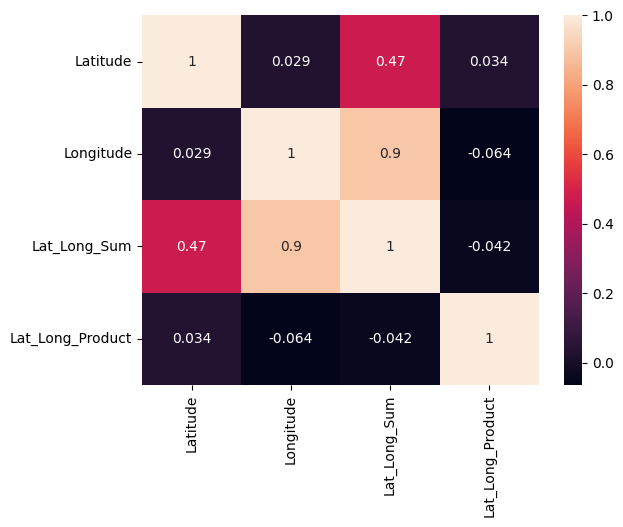

In [111]:
# 2. Interaction features
data = data.drop(columns=['Distance_from_Ref'],axis=1)
data['Lat_Long_Sum'] = data['Latitude'] + data['Longitude']
data['Lat_Long_Product'] = data['Latitude'] * data['Longitude']
corr = data.corr()
sns.heatmap(corr,annot=True)
plt.show()

The Direction/Angle feature represents the angular orientation of a point (Latitude, Longitude) relative to a reference point (in this case, the origin at (0, 0)). The angle is calculated using the arctangent function.

This feature is useful because it converts the spatial data into a single value that captures directional information. Angles are commonly used in geographical data to measure orientation or direction.

**Angle_from_Ref=arctan2(Longitude,Latitude)**

arctan2(y, x) is the two-argument arctangent function.
It computes the angle between the positive x-axis and the point (x, y) in a Cartesian coordinate system.
The result is in radians, ranging from -π to π.


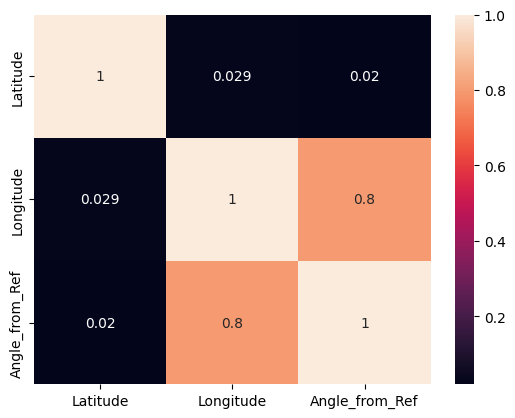

In [112]:
# 4. Direction/Angle feature
data = data.drop(columns=['Lat_Long_Sum','Lat_Long_Product'],axis=1)
data['Angle_from_Ref'] = np.arctan2(data['Longitude'], data['Latitude'])
corr = data.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [113]:
from sklearn.metrics import silhouette_score
# Define the range of cluster numbers to test
cluster_range = range(2, 11)
inertia = []  # For Elbow Method
silhouette_scores = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data[['Latitude', 'Longitude']])
    inertia.append(kmeans.inertia_)  # Sum of squared distances to cluster centers
    silhouette_scores.append(silhouette_score(data[['Latitude', 'Longitude']], cluster_labels))
# Optimal number of clusters based on Silhouette Score
optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
optimal_clusters

2

In [114]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Latitude', 'Longitude']])

In [84]:
data.head()

,Latitude,Longitude,Angle_from_Ref,Cluster
0,-22.582779,-113.352146,-1.767448,0
1,81.128575,15.084341,0.183832,1
2,41.758910,134.260501,1.269252,1
3,17.758527,83.600959,1.361487,1
4,-61.916645,110.362013,2.082070,1


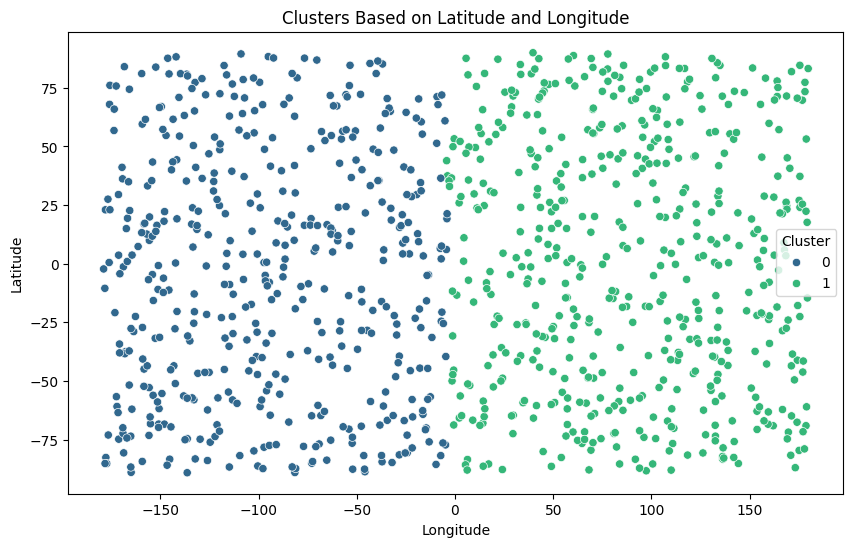

In [115]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['Longitude'],
    y=data['Latitude'],
    hue=data['Cluster'],
    palette='viridis',
    legend='full'
)
plt.title("Clusters Based on Latitude and Longitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Cluster")
plt.show()

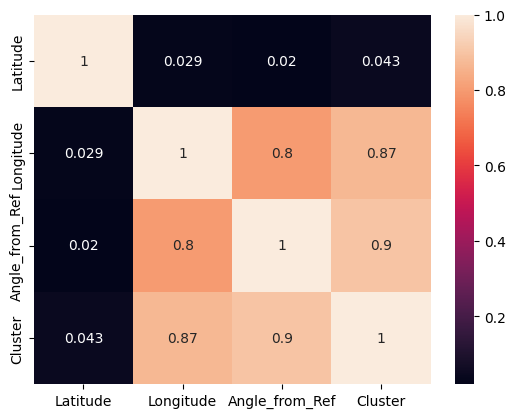

In [116]:
corr = data.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [117]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Standardize the Latitude and Longitude features
scaler = StandardScaler()
lat_long_scaled = scaler.fit_transform(data[['Latitude', 'Longitude']])

In [118]:
pca = PCA(n_components=2)  # Two components for Latitude and Longitude
principal_components = pca.fit_transform(lat_long_scaled)

data['PCA_Component_1'] = principal_components[:, 0]
data['PCA_Component_2'] = principal_components[:, 1]

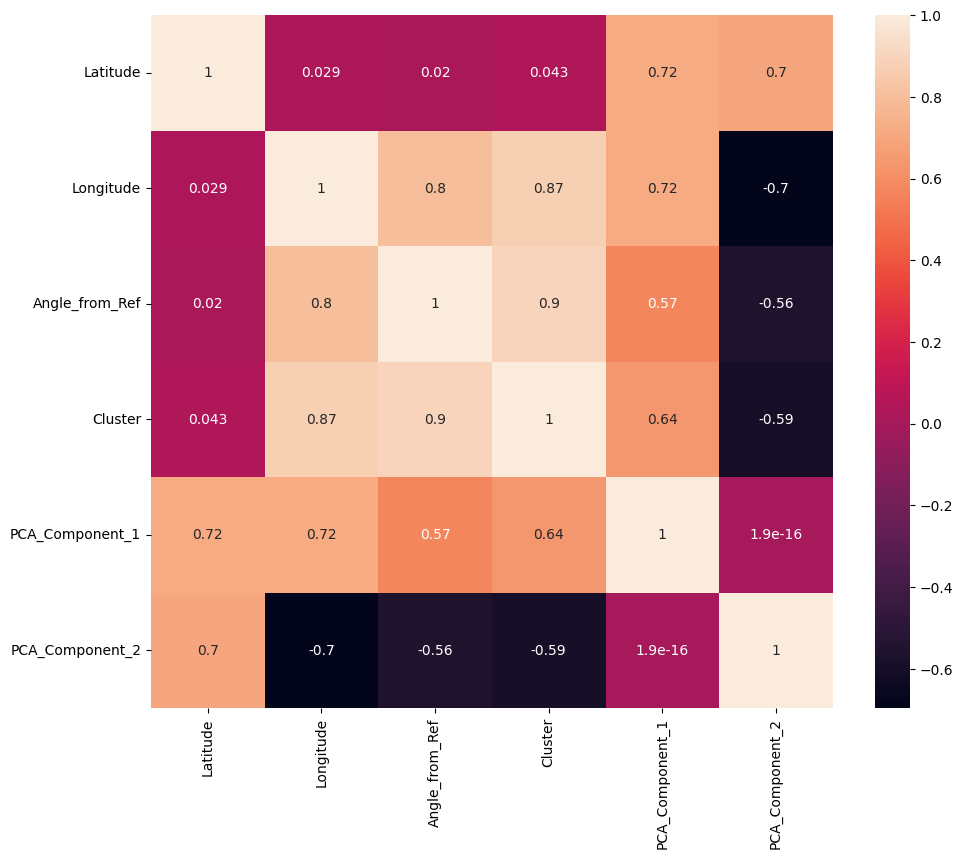

In [119]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(11,9))
corr = data.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [120]:
data['PCA_Component_2'] = np.log(data['PCA_Component_2']+1)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


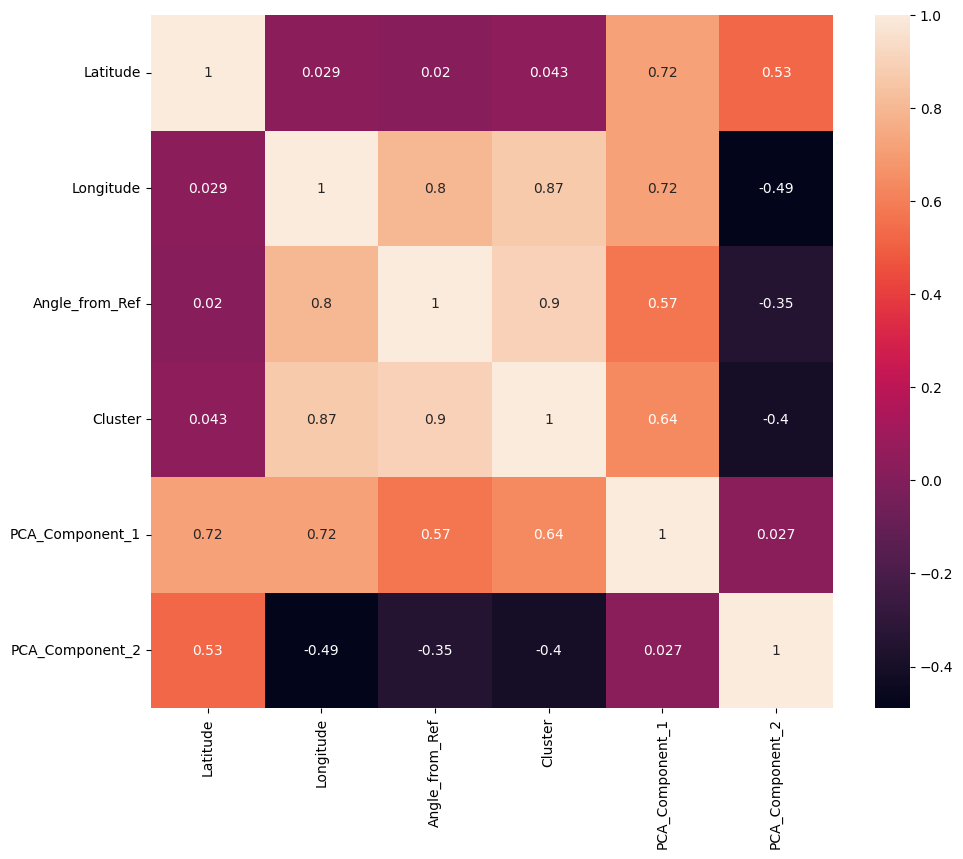

In [121]:
fig,ax = plt.subplots(figsize=(11,9))
corr = data.corr()
sns.heatmap(corr,annot=True)
plt.show()

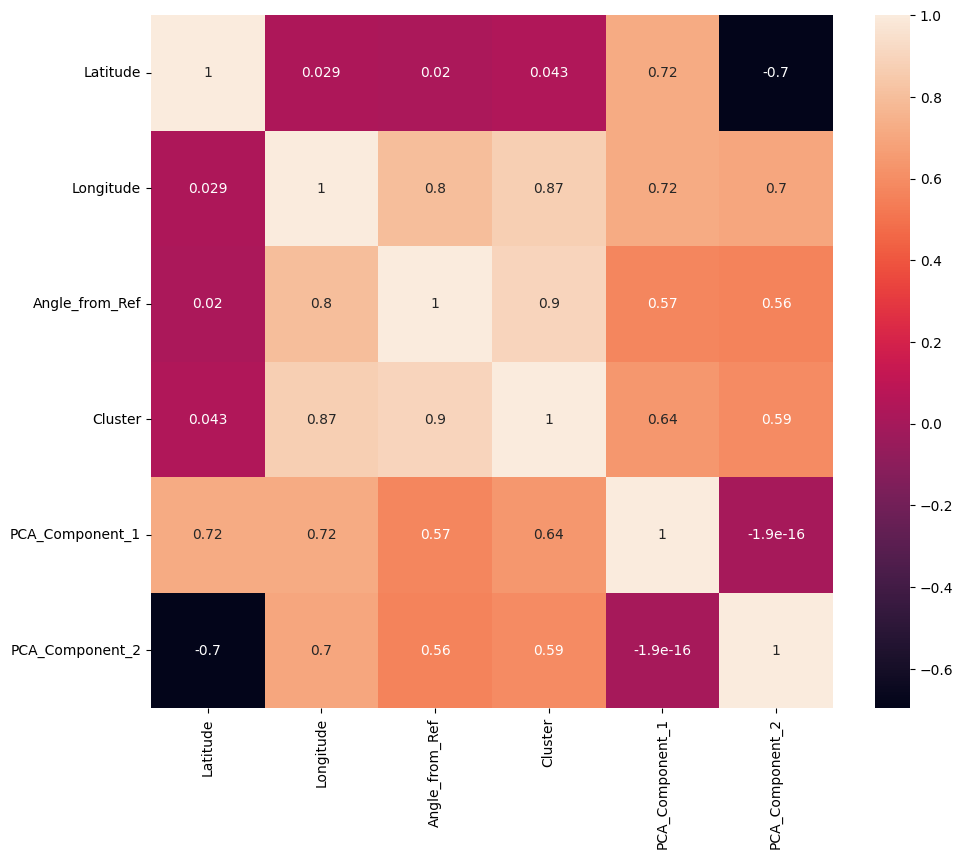

In [109]:
data['PCA_Component_2'] = -data['PCA_Component_2']
fig,ax = plt.subplots(figsize=(11,9))
corr = data.corr()
sns.heatmap(corr,annot=True)
plt.show()

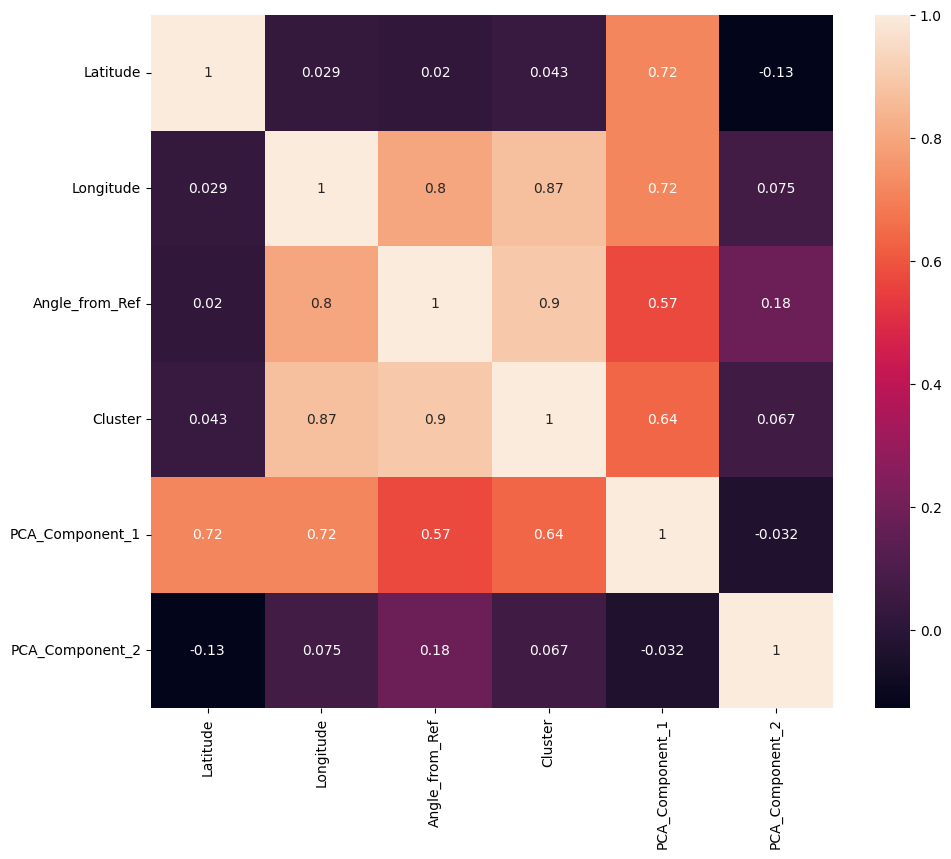

In [93]:
data['PCA_Component_2'] = np.abs(data['PCA_Component_2'])
fig,ax = plt.subplots(figsize=(11,9))
corr = data.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [94]:
data['PCA_Component_2'] = np.log(data['PCA_Component_2']+1)

In [122]:
null_counts = data.isnull().sum()
print(null_counts)

Latitude             0
Longitude            0
Angle_from_Ref       0
Cluster              0
PCA_Component_1      0
PCA_Component_2    176
dtype: int64


In [123]:
data_cleaned = data.dropna() # replace with mean or median

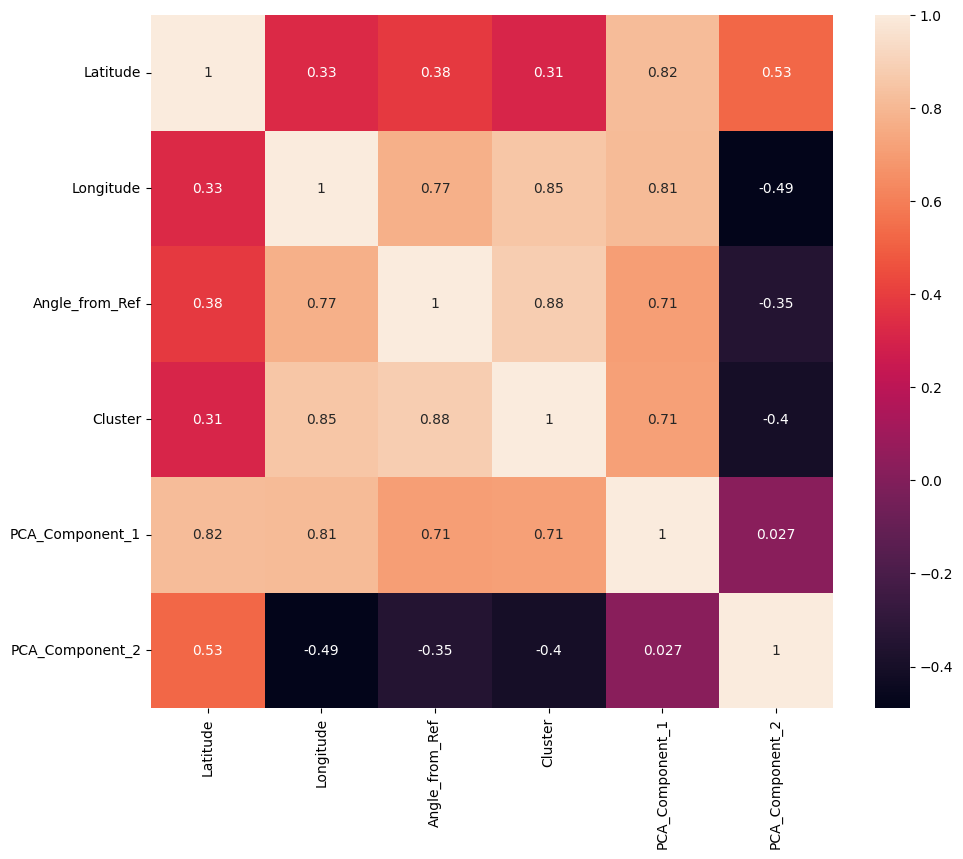

In [124]:
fig,ax = plt.subplots(figsize=(11,9))
corr = data_cleaned.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [125]:
data_cleaned.head()

,Latitude,Longitude,Angle_from_Ref,Cluster,PCA_Component_1,PCA_Component_2
0,-22.582779,-113.352146,-1.767448,0,-1.059585,0.404885
1,81.128575,15.084341,0.183832,1,1.199539,0.708339
2,41.758910,134.260501,1.269252,1,1.471408,-0.357519
3,17.758527,83.600959,1.361487,1,0.807794,-0.332354
7,65.911706,125.710435,1.087887,1,1.738848,0.078681


In [127]:
# Trigonometric Transformations of the Angle
data_cleaned['Sin_Angle'] = np.sin(data_cleaned['Angle_from_Ref'])
data_cleaned['Cos_Angle'] = np.cos(data_cleaned['Angle_from_Ref'])

<ipython-input-127-4890075c8fa1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Sin_Angle'] = np.sin(data_cleaned['Angle_from_Ref'])
<ipython-input-127-4890075c8fa1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Cos_Angle'] = np.cos(data_cleaned['Angle_from_Ref'])


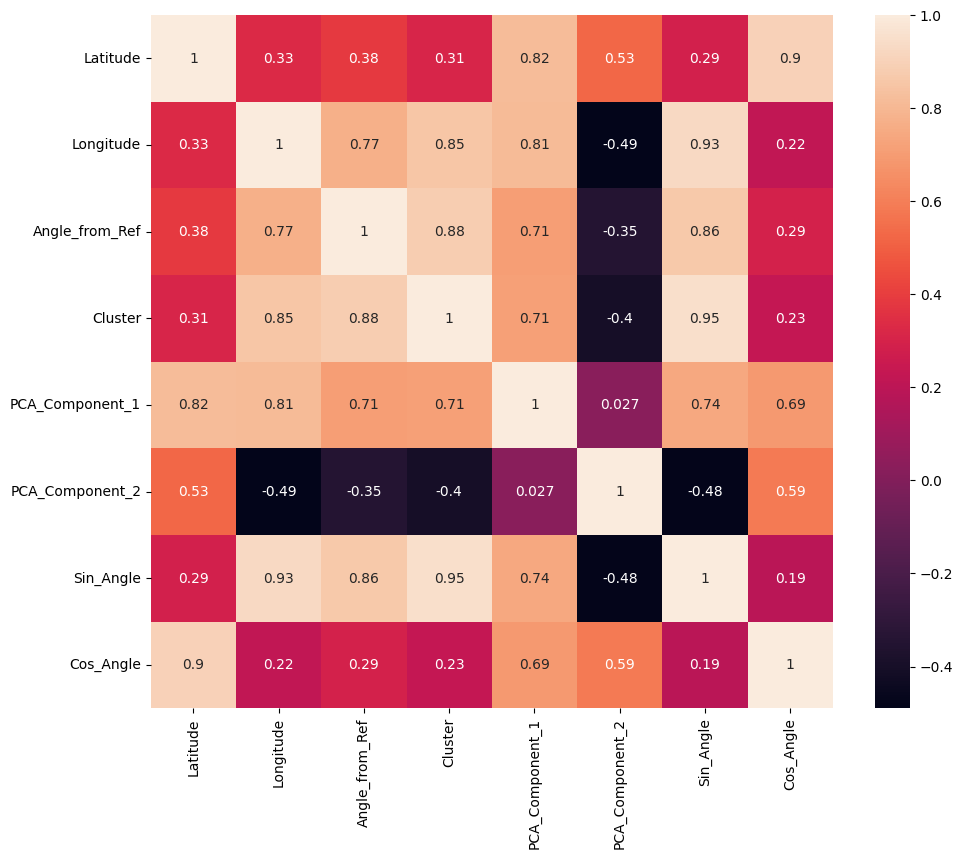

In [128]:
fig,ax = plt.subplots(figsize=(11,9))
corr = data_cleaned.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [129]:
data_cleaned.head()

,Latitude,Longitude,Angle_from_Ref,Cluster,PCA_Component_1,PCA_Component_2,Sin_Angle,Cos_Angle
0,-22.582779,-113.352146,-1.767448,0,-1.059585,0.404885,-0.980726,-0.195387
1,81.128575,15.084341,0.183832,1,1.199539,0.708339,0.182798,0.983150
2,41.758910,134.260501,1.269252,1,1.471408,-0.357519,0.954879,0.296995
3,17.758527,83.600959,1.361487,1,0.807794,-0.332354,0.978175,0.207784
7,65.911706,125.710435,1.087887,1,1.738848,0.078681,0.885648,0.464357


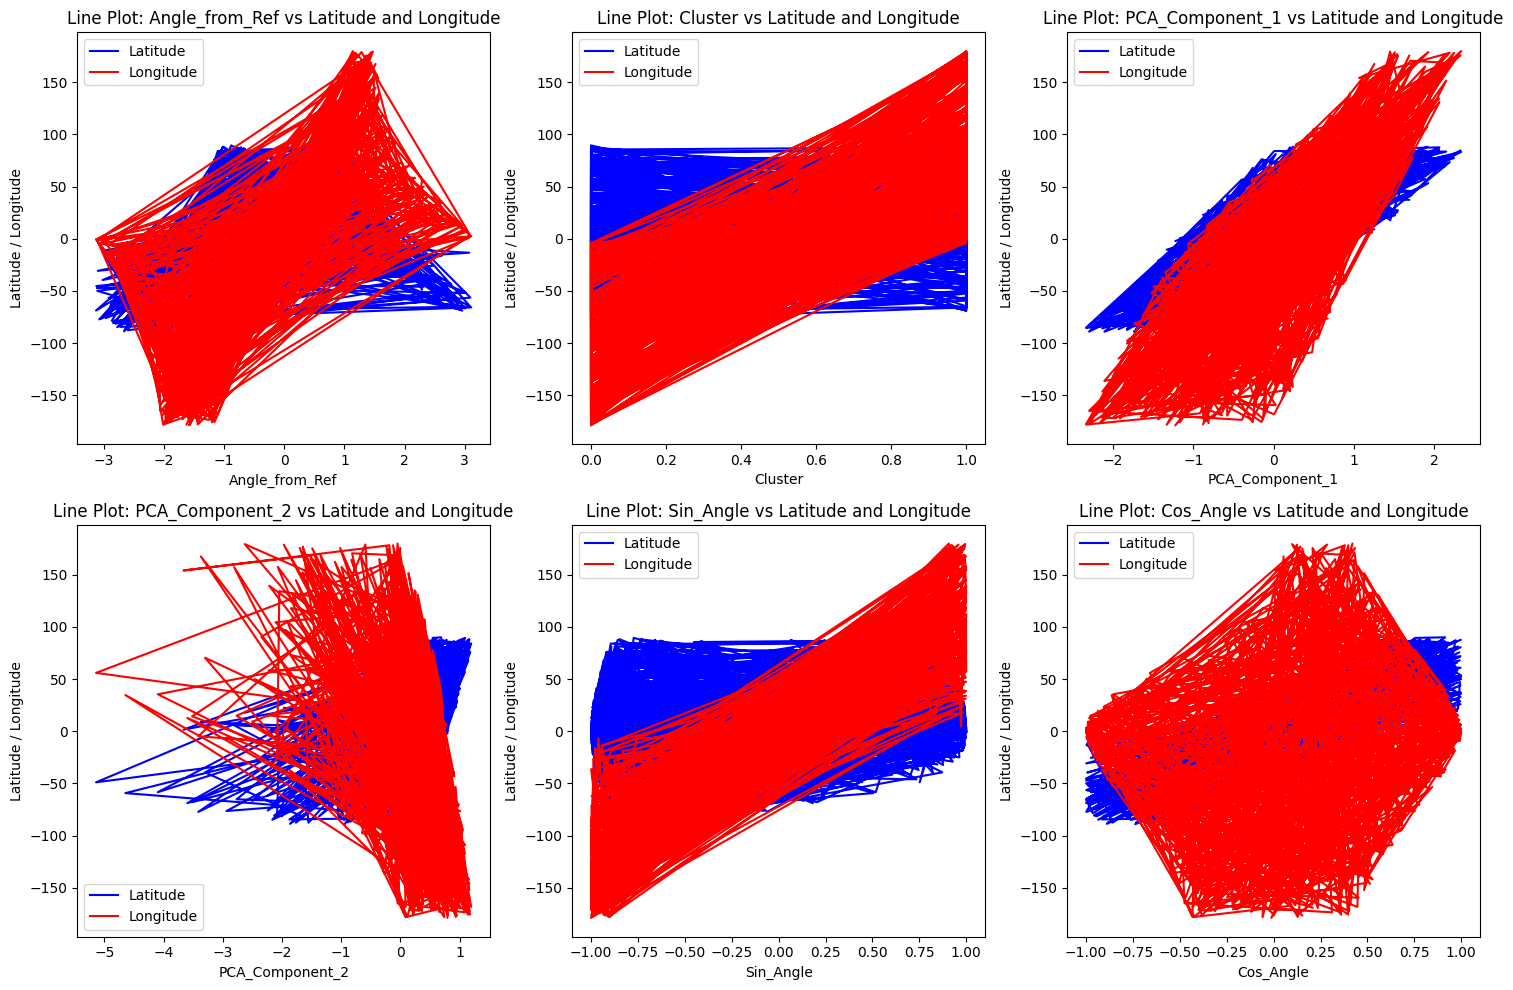

In [135]:
import matplotlib.pyplot as plt

# List of input features
features_x = ['Angle_from_Ref', 'Cluster', 'PCA_Component_1', 'PCA_Component_2', 'Sin_Angle', 'Cos_Angle']
y = ['Latitude', 'Longitude']

# Create line plots to observe how input features influence Latitude and Longitude
plt.figure(figsize=(15, 10))

# Iterate through each feature in x to create line plots
for i, feature in enumerate(features_x, 1):
    plt.subplot(2, 3, i)
    plt.plot(data_cleaned[feature], data_cleaned['Latitude'], color='blue', label='Latitude')
    plt.plot(data_cleaned[feature], data_cleaned['Longitude'], color='red', label='Longitude')
    plt.xlabel(feature)
    plt.ylabel('Latitude / Longitude')
    plt.title(f'Line Plot: {feature} vs Latitude and Longitude')
    plt.legend()

plt.tight_layout()
plt.show()
